In [ ]:
import kagglehub
import shutil
import os

# Veri setini indir
dataset_path = kagglehub.dataset_download('smaildurcan/turkish-license-plate-dataset')
print(f'✅ Veri seti indirildi: {dataset_path}')

# Yazılabilir alana kopyala
destination = '/content/plaka_data/'
if os.path.exists(destination):
    shutil.rmtree(destination)

shutil.copytree(dataset_path, destination)

# 'label' klasörünü 'labels' olarak yeniden adlandır (YOLO formatı)
old_label = os.path.join(destination, 'label')
new_label = os.path.join(destination, 'labels')
if os.path.exists(old_label):
    os.rename(old_label, new_label)
    print('✅ Etiket klasörü güncellendi: labels')

print(f'✅ Hazır klasör: {os.listdir(destination)}')

Using Colab cache for faster access to the 'turkish-license-plate-dataset' dataset.
✅ Veri seti indirildi: /kaggle/input/turkish-license-plate-dataset
✅ Etiket klasörü güncellendi: labels
✅ Hazır klasör: ['images', 'labels']


In [ ]:
# plaka_data.yaml dosyasını oluştur
config_content = """path: /content/plaka_data/
train: images
val: images
nc: 1
names: ['license_plate']
"""

with open('plaka_data.yaml', 'w') as f:
    f.write(config_content)

print('✅ plaka_data.yaml dosyası oluşturuldu')

✅ plaka_data.yaml dosyası oluşturuldu


In [ ]:
!pip install -q ultralytics

from ultralytics import YOLO
import torch

# GPU kontrolü
if torch.cuda.is_available():
    print(f'✅ GPU aktif: {torch.cuda.get_device_name(0)}')
else:
    print('⚠️ GPU bulunamadı, CPU kullanılacak')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
⚠️ GPU bulunamadı, CPU kullanılacak


In [ ]:
# Önceden eğitilmiş model yükle
model = YOLO('yolov8s.pt')

print('🚀 Eğitim başlıyor...')

# Modeli eğit
results = model.train(
    data='plaka_data.yaml',
    epochs=1,           # Daha iyi sonuç için 50 epoch
    imgsz=640,
    batch=16,
    name='plaka_dedektoru'
)

print('✅ Eğitim tamamlandı!')

🚀 Eğitim başlıyor...
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=plaka_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plaka_dedektoru, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

📊 Model performansı hesaplanıyor...
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1857.8±753.8 MB/s, size: 2004.9 KB)
val: Scanning /content/plaka_data/labels.cache... 1955 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1955/1955 1.3Mit/s 0.0s
train: /content/plaka_data/images/1.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/105.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/125.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/126.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/13.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/134.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/140.jpg: corrupt JPEG restored and saved
train: /content/plaka_data/images/152.jpg: corrupt JPEG rest

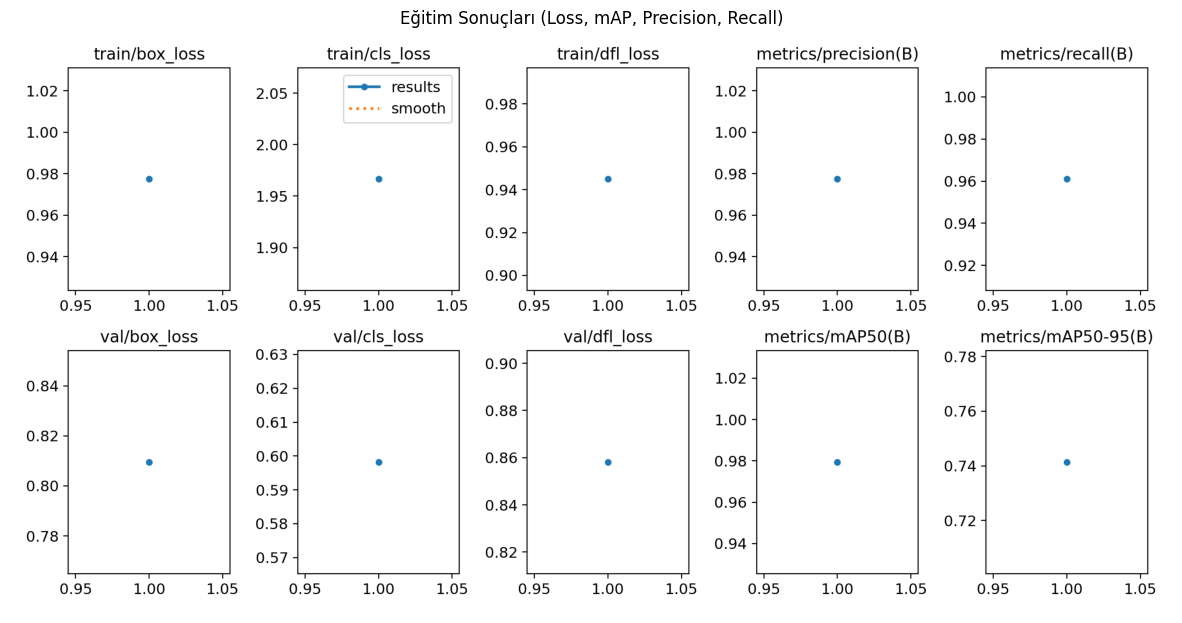

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Eğitilmiş modeli yükle
best_model = YOLO('/content/runs/detect/plaka_dedektoru/weights/best.pt')

# Performans metriklerini hesapla
print('📊 Model performansı hesaplanıyor...')
metrics = best_model.val(data='plaka_data.yaml', imgsz=640, batch=16)

# Sonuçları yazdır
print('\n--- PERFORMANS METRİKLERİ ---')
print(f'✅ mAP50-95: {metrics.box.map:.3f}')
print(f'✅ mAP50: {metrics.box.map50:.3f}')
print(f'✅ Precision: {metrics.box.mp:.3f}')
print(f'✅ Recall: {metrics.box.mr:.3f}')

# Eğitim grafiklerini göster
results_img = '/content/runs/detect/plaka_dedektoru/results.png'
if os.path.exists(results_img):
    print('\n📈 Eğitim grafikleri:')
    img = Image.open(results_img)
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Eğitim Sonuçları (Loss, mAP, Precision, Recall)')
    plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 28.2 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete🖼️ Test görseli: 1057.jpg



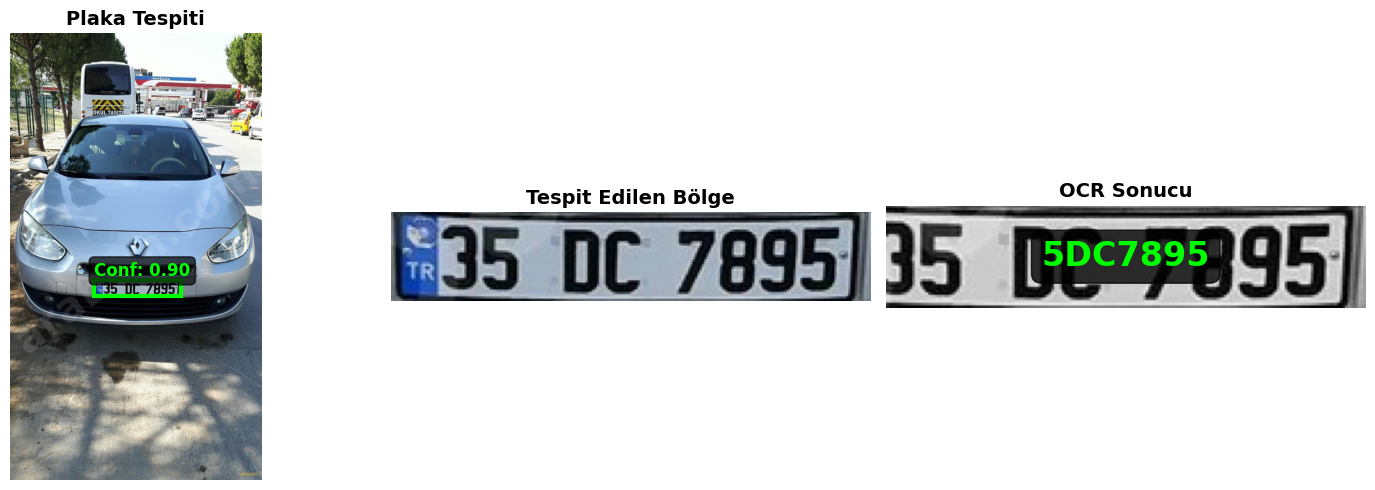

✅ Tespit edilen plaka: 5DC7895


In [ ]:
!pip install -q easyocr

import cv2
import easyocr
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# OCR okuyucu başlat
reader = easyocr.Reader(['tr', 'en'], gpu=True)

def detect_and_read_plate(image_path, model, reader, show_plot=True):
    """Plaka tespit et, oku ve görselleştir"""

    # Plaka tespiti
    results = model.predict(source=image_path, save=False, conf=0.5, verbose=False)

    # Orijinal görseli oku
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if len(results[0].boxes) == 0:
        return None, img_rgb, None

    # İlk tespit edilen plaka
    box = results[0].boxes[0].xyxy[0].cpu().numpy()
    x1, y1, x2, y2 = map(int, box)
    conf = results[0].boxes[0].conf[0].item()

    # Plaka bölgesini kes
    plaka_crop = img[y1:y2, x1:x2]

    # Griye çevir ve TR bayrağını kırp
    gray = cv2.cvtColor(plaka_crop, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    gray = gray[:, int(w*0.13):]

    # OCR
    ocr_result = reader.readtext(gray, detail=0,
                                 allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    raw_text = ''.join(ocr_result).upper().replace(' ', '')

    # Türk plaka formatı (34ABC1234)
    pattern = r'(0[1-9]|[1-7][0-9]|8[01])[A-Z]{1,3}[0-9]{2,4}'
    match = re.search(pattern, raw_text)
    plaka_text = match.group(0) if match else raw_text

    # Görselleştirme
    if show_plot:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # 1. Orijinal görsel + tespit kutusu
        axes[0].imshow(img_rgb)
        rect = Rectangle((x1, y1), x2-x1, y2-y1,
                         linewidth=3, edgecolor='lime', facecolor='none')
        axes[0].add_patch(rect)
        axes[0].text(x1, y1-10, f'Conf: {conf:.2f}',
                     color='lime', fontsize=12, weight='bold',
                     bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
        axes[0].set_title('Plaka Tespiti', fontsize=14, weight='bold')
        axes[0].axis('off')

        # 2. Kırpılmış plaka
        axes[1].imshow(cv2.cvtColor(plaka_crop, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Tespit Edilen Bölge', fontsize=14, weight='bold')
        axes[1].axis('off')

        # 3. OCR sonucu
        axes[2].imshow(gray, cmap='gray')
        axes[2].text(gray.shape[1]//2, gray.shape[0]//2,
                     plaka_text,
                     fontsize=24, weight='bold', color='lime',
                     ha='center', va='center',
                     bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
        axes[2].set_title('OCR Sonucu', fontsize=14, weight='bold')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

    return plaka_text, img_rgb, (x1, y1, x2, y2, conf)

# Tek görsel testi
IMAGE_DIR = '/content/plaka_data/images'
image_files = sorted([f for f in os.listdir(IMAGE_DIR)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

TEST_INDEX = 65  # 🔴 Test görselini seç
test_image = os.path.join(IMAGE_DIR, image_files[TEST_INDEX])

print(f'🖼️ Test görseli: {image_files[TEST_INDEX]}\n')
plaka, img, bbox = detect_and_read_plate(test_image, best_model, reader)

if plaka:
    print(f'✅ Tespit edilen plaka: {plaka}')
else:
    print('❌ Plaka tespit edilemedi')

In [ ]:
import random
from tqdm import tqdm

def batch_test(model, reader, image_dir, num_samples=20):
    """Rastgele N görsel üzerinde toplu test yap"""

    image_files = [f for f in os.listdir(image_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Rastgele örnek seç
    test_samples = random.sample(image_files, min(num_samples, len(image_files)))

    results = {
        'tespit_basarili': 0,
        'tespit_basarisiz': 0,
        'plakalar': [],
        'basarisiz_gorseller': []
    }

    print(f'🧪 {len(test_samples)} görsel test ediliyor...\n')

    for img_file in tqdm(test_samples):
        img_path = os.path.join(image_dir, img_file)
        plaka, _, bbox = detect_and_read_plate(img_path, model, reader, show_plot=False)

        if plaka and bbox:
            results['tespit_basarili'] += 1
            results['plakalar'].append((img_file, plaka))
        else:
            results['tespit_basarisiz'] += 1
            results['basarisiz_gorseller'].append(img_file)

    return results

# Toplu test yap
test_results = batch_test(best_model, reader, IMAGE_DIR, num_samples=20)

# İstatistikleri göster
print('\n' + '='*50)
print('📊 BATCH TEST SONUÇLARI')
print('='*50)
print(f'✅ Başarılı tespit: {test_results["tespit_basarili"]}/20')
print(f'❌ Başarısız tespit: {test_results["tespit_basarisiz"]}/20')
print(f'📈 Başarı oranı: {(test_results["tespit_basarili"]/20)*100:.1f}%')

print('\n--- Tespit Edilen Plakalar ---')
for img_name, plaka in test_results['plakalar'][:10]:  # İlk 10 tanesi
    print(f'  {img_name}: {plaka}')

if test_results['basarisiz_gorseller']:
    print('\n--- Başarısız Görseller ---')
    for img_name in test_results['basarisiz_gorseller'][:5]:
        print(f'  ❌ {img_name}')

🧪 20 görsel test ediliyor...



100%|██████████| 20/20 [00:03<00:00,  5.87it/s]


📊 BATCH TEST SONUÇLARI
✅ Başarılı tespit: 20/20
❌ Başarısız tespit: 0/20
📈 Başarı oranı: 100.0%

--- Tespit Edilen Plakalar ---
  561.jpg: 6LN4301
  72.jpg: 58ABS809
  1872.jpg: 58DC102
  1060.jpg: 01YY110
  1931.jpg: 77AF064
  228.jpg: 16SCZ60
  1145.jpg: 96MGD40
  1096.jpg: 28SN426
  1855.jpg: 24J3003
  1510.jpg: 01ERS89


In [ ]:
# Belirli indekslerdeki örnekleri göster
secili_indeksler = [61, 62, 63, 64]  # İstediğiniz indeksleri buraya yazın

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

print('✅ Seçili örnekler:\n')

for i, idx in enumerate(secili_indeksler):
    if idx < len(test_results['plakalar']):
        img_name, plaka = test_results['plakalar'][idx]
        img_path = os.path.join(IMAGE_DIR, img_name)

        # Tespit yap
        results = best_model.predict(source=img_path, save=False, conf=0.5, verbose=False)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if len(results[0].boxes) > 0:
            box = results[0].boxes[0].xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = map(int, box)

            # Görselleştir
            axes[i].imshow(img_rgb)
            rect = Rectangle((x1, y1), x2-x1, y2-y1,
                             linewidth=3, edgecolor='lime', facecolor='none')
            axes[i].add_patch(rect)
            axes[i].text(x1, y1-10, plaka,
                         color='lime', fontsize=14, weight='bold',
                         bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
            axes[i].set_title(f'İndeks: {idx} - Görsel: {img_name}', fontsize=10)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, 'Plaka tespit edilemedi',
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'İndeks: {idx} - Görsel: {img_name}', fontsize=10)
            axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'İndeks {idx} bulunamadı',
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].axis('off')

plt.tight_layout()
plt.suptitle('✅ Seçili İndekslerdeki Plaka Tespitleri', fontsize=16, weight='bold', y=1.02)
plt.show()

print(f"\nToplam örnek sayısı: {len(test_results['plakalar'])}")

✅ Başarılı tespit örnekleri:



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


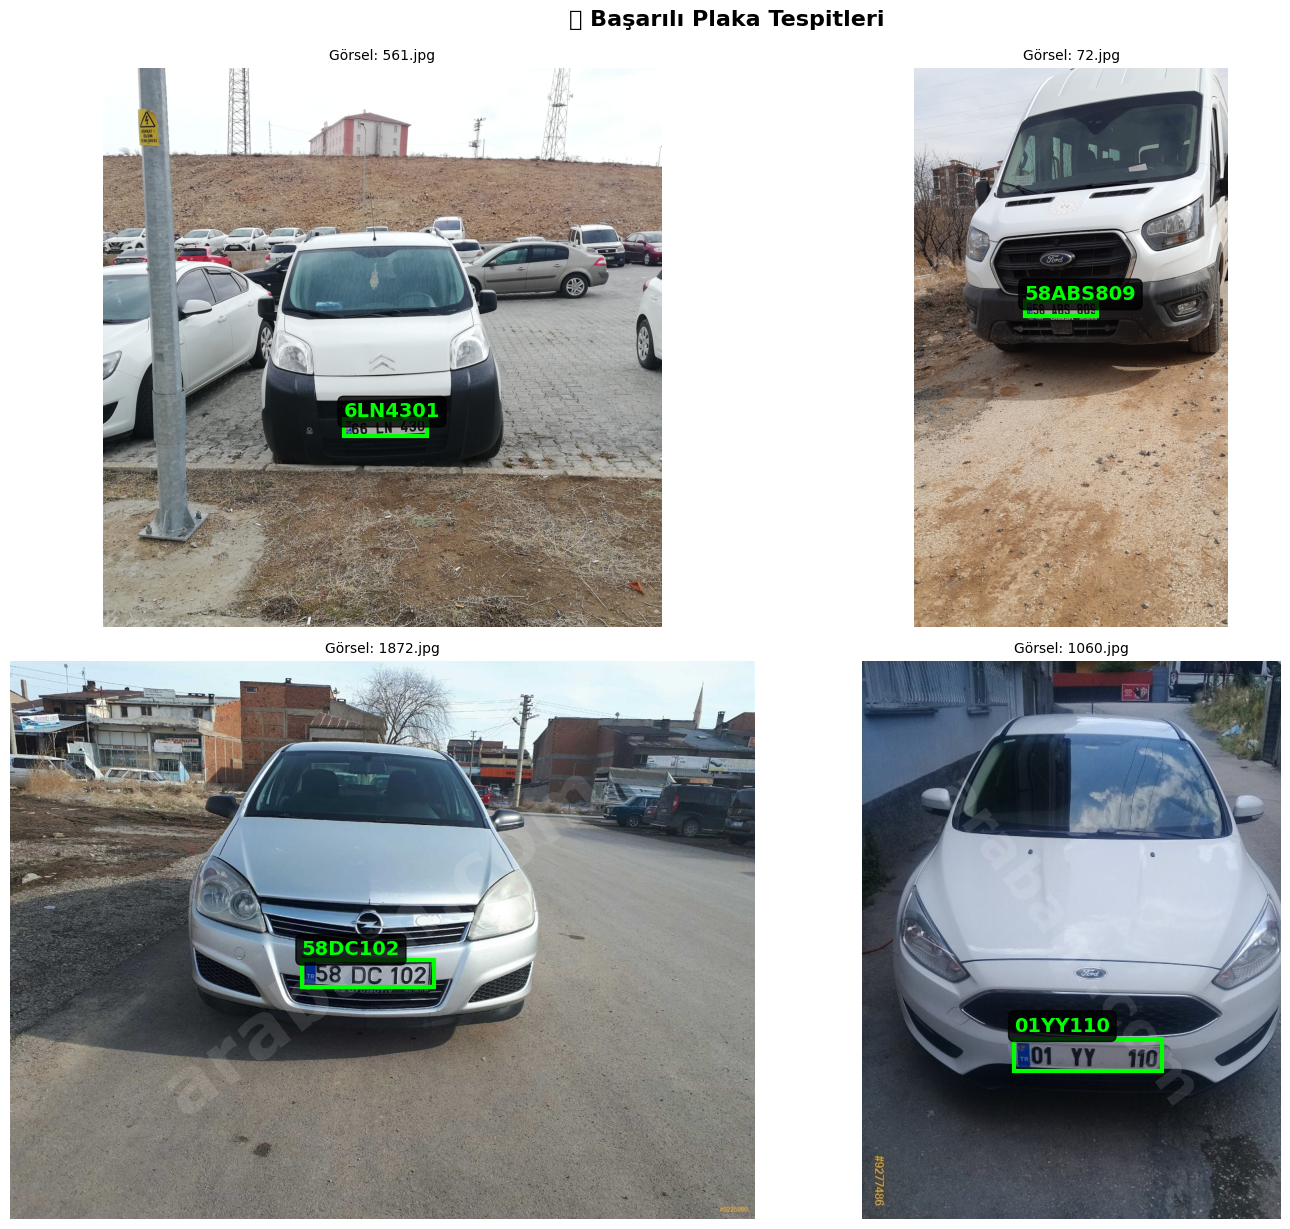

In [ ]:
# Başarılı örneklerden 4 tanesini göster
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

print('✅ Başarılı tespit örnekleri:\n')

for i in range(min(4, len(test_results['plakalar']))):
    img_name, plaka = test_results['plakalar'][i]
    img_path = os.path.join(IMAGE_DIR, img_name)

    # Tespit yap
    results = best_model.predict(source=img_path, save=False, conf=0.5, verbose=False)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if len(results[0].boxes) > 0:
        box = results[0].boxes[0].xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = map(int, box)

        # Görselleştir
        axes[i].imshow(img_rgb)
        rect = Rectangle((x1, y1), x2-x1, y2-y1,
                         linewidth=3, edgecolor='lime', facecolor='none')
        axes[i].add_patch(rect)
        axes[i].text(x1, y1-10, plaka,
                     color='lime', fontsize=14, weight='bold',
                     bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
        axes[i].set_title(f'Görsel: {img_name}', fontsize=10)
        axes[i].axis('off')

plt.tight_layout()
plt.suptitle('✅ Başarılı Plaka Tespitleri', fontsize=16, weight='bold', y=1.02)
plt.show()